## Red Mic, LLC
### Corporate Culture Data Analysis

#### Kyle Tolliver, Jesse Gibbons, Richard Kung, Shane Mecham, Benjamin Hinchman


In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import altair as alt

In [3]:
hr = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/hr.csv')

hr.head()

,Employee_Name,EmpID,PayRate,Position,State,Zip,DOB,Sex,MaritalDesc,Dependents,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,EmpSatisfaction2,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,AbsencesLast30
0,"Brown, Mia",1103024456,59280.0,Accountant I,MA,1450,11/24/87,F,Married,0,US Citizen,No,Black or African American,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,4.08,2,93,9,1/15/19,0.0,1
1,"LaRotonda, William",1106026572,47840.0,Accountant I,MA,1460,4/26/84,M,Divorced,4,US Citizen,No,Black or African American,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,10.00,4,75,7,1/17/19,0.0,2
2,"Steans, Tyrone",1302053333,60320.0,Accountant I,MA,2703,9/1/86,M,Single,2,US Citizen,No,White,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Internet Search,Fully Meets,7.80,5,60,6,1/18/19,0.0,7
3,"Howard, Estelle",1211050782,44720.0,Administrative Assistant,MA,2170,9/16/85,F,Married,3,US Citizen,No,White,2/16/15,4/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,Pay Per Click - Google,Fully Meets,6.48,3,83,0,NaN,NaN,2
4,"Singh, Nan",1307059817,34444.8,Administrative Assistant,MA,2330,5/19/88,F,Single,4,US Citizen,No,White,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,10.00,3,36,3,1/15/19,0.0,2


In [4]:
hr.dtypes

Employee_Name                  object
EmpID                           int64
PayRate                       float64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
Dependents                     object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName                    object
RecruitmentSource              object
PerformanceScore               object
EngagementSurvey              float64
EmpSatisfaction                 int64
EmpSatisfaction2                int64
SpecialProjectsCount            int64
LastPerformanceReview_Date     object
DaysLateLast

#### Equitable Pay Analysis

In [5]:
def calcZScore (row):
  if len(hr[hr['Position'] == row.Position]) > 1 and hr[hr['Position'] == row.Position].SalaryRate.std() != 0:
    return (row.SalaryRate - hr[hr['Position'] == row.Position].SalaryRate.mean())/ (hr[hr['Position'] == row.Position].SalaryRate.std())
  else:
    return 0

In [6]:
hourly = ['Production Technician I', 'Production Technician II']

hr['SalaryRate'] = hr.apply(lambda x: x.PayRate * 40 * 52 if x.Position in hourly else x.PayRate, axis=1)
hr['SalaryZ'] = hr.apply(calcZScore, axis=1)

In [7]:
singularPositions = ['Principal Data Architect', 'IT Manager - Support', 'Data Analyst', 'Software Engineering Manager', 'CIO', 'IT Manager - Infra', 'Data Architect', 'BI Director', 'President & CEO', 'IT Director', 'Director of Operations', 'Director of Sales', 'Enterprise Architect']
singularData = hr[~hr['Position'].isin(singularPositions)]
singularData = singularData[singularData['Position'] != 'Data Analyst']
singularData['Position'].value_counts()

Production Technician I     136
Production Technician II     57
Area Sales Manager           27
Production Manager           14
Software Engineer             9
IT Support                    8
Database Administrator        5
Sr. Network Engineer          5
Network Engineer              5
BI Developer                  4
Accountant I                  3
Sales Manager                 3
Senior BI Developer           3
Administrative Assistant      3
IT Manager - DB               2
Sr. Accountant                2
Shared Services Manager       2
Sr. DBA                       2
Data Analyst                  1
Name: Position, dtype: int64

In [8]:
bars = alt.Chart(singularData).mark_bar().encode(
    x = alt.X('Sex'),
    y = alt.Y('average(SalaryRate):Q', axis=alt.Axis(format='$', title="Average Salary Rate")),
    color = 'count()'
    ).properties(
    width = 100
)
text = text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count():Q',
    color=alt.value('black')
)

alt.layer(bars, text, data=singularData).facet(
    column='Position'
)

alt.FacetChart(...)

In [9]:
bars = alt.Chart(singularData).mark_bar().encode(
    x = alt.X('RaceDesc:N', axis=alt.Axis(title='Race')),
    y = alt.Y('average(SalaryRate):Q', axis=alt.Axis(format='$', title="Average Salary Rate")),
    color = 'count():Q'
    )

text = text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count():Q',
    color=alt.value('black')
)

alt.layer(bars, text, data=singularData).facet(
    column='Position'
)

alt.FacetChart(...)

In [10]:
bars = alt.Chart(singularData).mark_bar().encode(
    x = alt.X('MaritalDesc', axis=alt.Axis(title='Marital Status')),
    y = alt.Y('average(SalaryRate)', axis=alt.Axis(title='Average Salary Rate')),
    color = 'count()',
)
text = text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count():Q',
    color=alt.value('black')
)

alt.layer(bars, text, data=singularData).facet(
    column='Position'
)

alt.FacetChart(...)

#### Employee Longevity Clusters

In [11]:
hr['DateofHire'] = pd.to_datetime(hr['DateofHire'])
hr['DateofTermination'] = pd.to_datetime(hr['DateofTermination'])

In [12]:
def len_of_employment(x):
  if pd.isnull(x["DateofTermination"]):
    return (pd.Timestamp.today() - x['DateofHire']) / np.timedelta64(1, 'Y')
  else:
    return (x['DateofTermination'] - x['DateofHire']) / np.timedelta64(1, 'Y')


def terminated(x):
  if pd.isnull(x['DateofTermination']):
    return "No"
  else:
    return "Yes"

In [13]:
hr['LengthofEmployment'] = hr.apply(len_of_employment, axis=1)
hr['CurrentlyEmployed'] = hr.apply(terminated, axis =1)

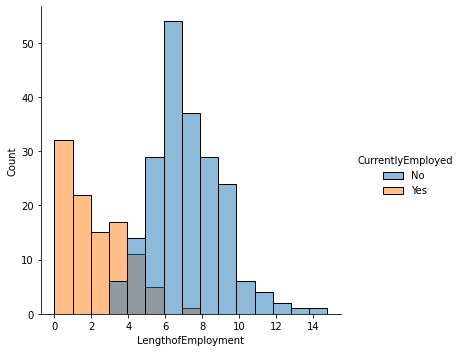

In [14]:
long_graph = sns.displot(data= hr, x= "LengthofEmployment", hue = 'CurrentlyEmployed', bins = 15)

#### Diversity	

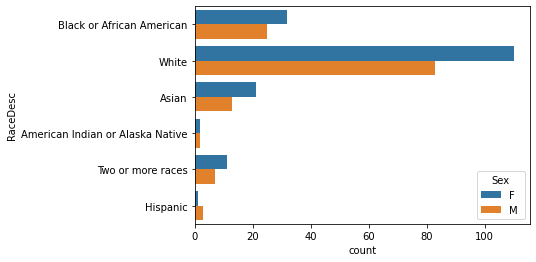

In [15]:
plot = sns.countplot(y="RaceDesc", hue="Sex", data=hr)

In [16]:
hr["RaceDesc"].value_counts(normalize=True)

White                               0.622581
Black or African American           0.183871
Asian                               0.109677
Two or more races                   0.058065
American Indian or Alaska Native    0.012903
Hispanic                            0.012903
Name: RaceDesc, dtype: float64

In [17]:
hr["Sex"].value_counts(normalize=True)

F     0.570968
M     0.429032
Name: Sex, dtype: float64

#### Employee Satisfaction and Engagement Survey Analysis

In [18]:
def len_of_employment(x):
  if pd.isnull(x["DateofTermination"]):
    return (pd.Timestamp.today() - pd.to_datetime(x.DateofHire)).days
  else:
    return (pd.to_datetime(x.DateofTermination)-pd.to_datetime(x.DateofHire)).days

In [19]:
hr["HireTimestamp"]=hr.DateofHire.to_timestamp
hr["CurrentEmployee"] = ~hr.DateofTermination.isna()
hr['DaysofEmployment'] = hr.apply(len_of_employment, axis=1)
loe = hr.DaysofEmployment[0]
hr["WeeksofEmployment"] = hr.DaysofEmployment/7
hr["YearsofEmployment"] = hr.WeeksofEmployment/52
flt = hr[["DaysofEmployment","EngagementSurvey","EmpSatisfaction","EmpSatisfaction2", "DateofTermination", "CurrentEmployee", "WeeksofEmployment","YearsofEmployment"]].copy()

Most recent Employee Satisfaction Survey:

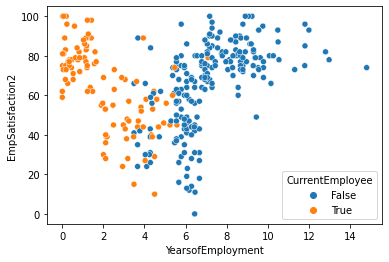

In [20]:
sns.scatterplot(data=flt, y="EmpSatisfaction2", x="YearsofEmployment", hue="CurrentEmployee")

Engagement Survey:

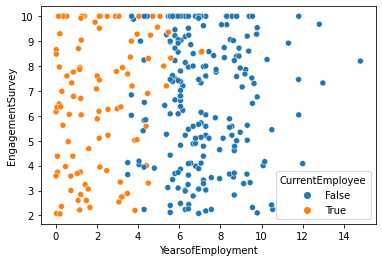

In [21]:
sns.scatterplot(data=flt, y="EngagementSurvey", x="YearsofEmployment", hue="CurrentEmployee")

Old Employee Satisfaction Survey:

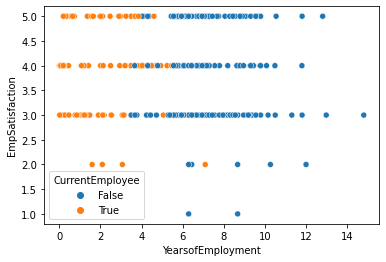

In [22]:
sns.scatterplot(data=flt, y="EmpSatisfaction", x="YearsofEmployment", hue="CurrentEmployee")

Individual Code is found in google drive [colab folder](https://drive.google.com/drive/folders/16DYnzu-6vcIAxw-sBqqOVM6NOfIj96NE?usp=sharing)